# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis


For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Ar
e there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("diabetes.csv")

# 1 Are there any missing values in the dataset?
# replace pregnancies with median
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].median())

# replace with mean for continuous values
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

# check for missing values in outcome
num_missing_outcome = df['Outcome'].isnull().sum()

# if there were this is what we would do witht hem
if num_missing_outcome > 0:
    df = df.dropna(subset=['Outcome'])

# The values have been filled with values I guessed would be most applicaibale to makign the model run smoothly 
print(num_missing_outcome)
print(df)

0
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                

In [3]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


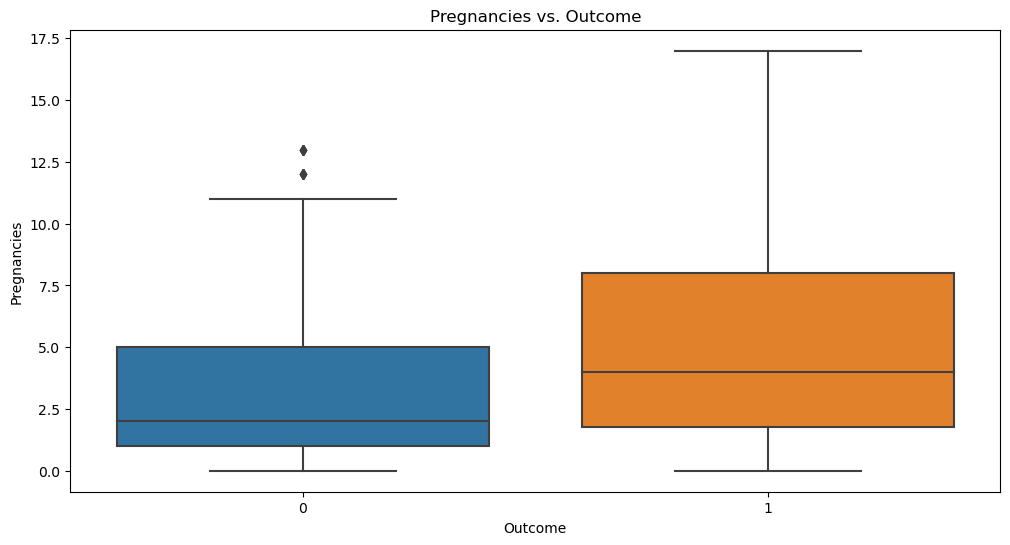

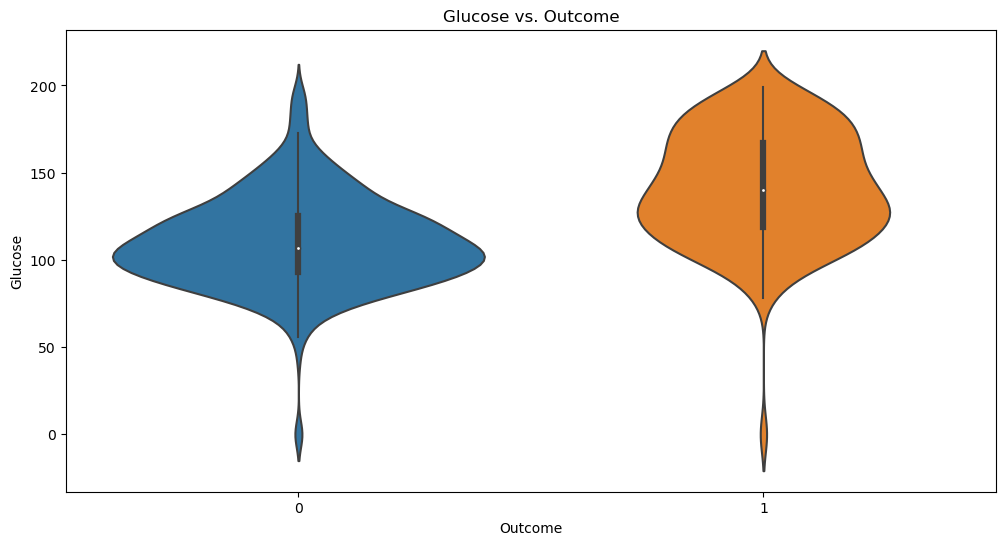

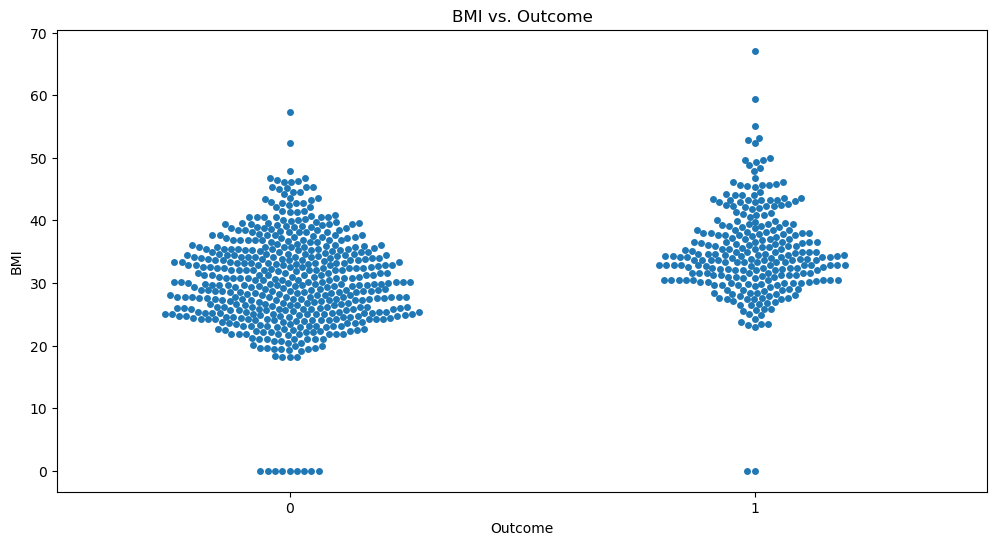

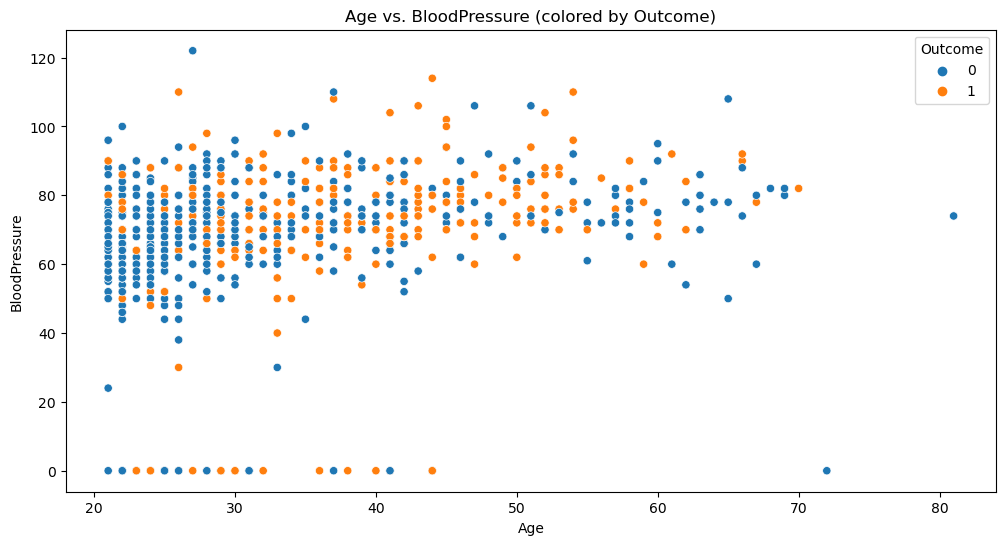

Correlation between X values and outcome :
 Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


In [4]:
# pregnancies vs outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title("Pregnancies vs. Outcome")
plt.show()

# glucose vs outcome
plt.figure(figsize=(12, 6))
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs. Outcome")
plt.show()

# bmi vs outcome
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs. Outcome")
plt.show()

# age vs blood pressure and outcome
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='BloodPressure', hue='Outcome', data=df)
plt.title("Age vs. BloodPressure (colored by Outcome)")
plt.show()

# Check how predictor variables are correlated with the outcome variable
correlation = df.corr()['Outcome']
print("Correlation between X values and outcome :\n", correlation)



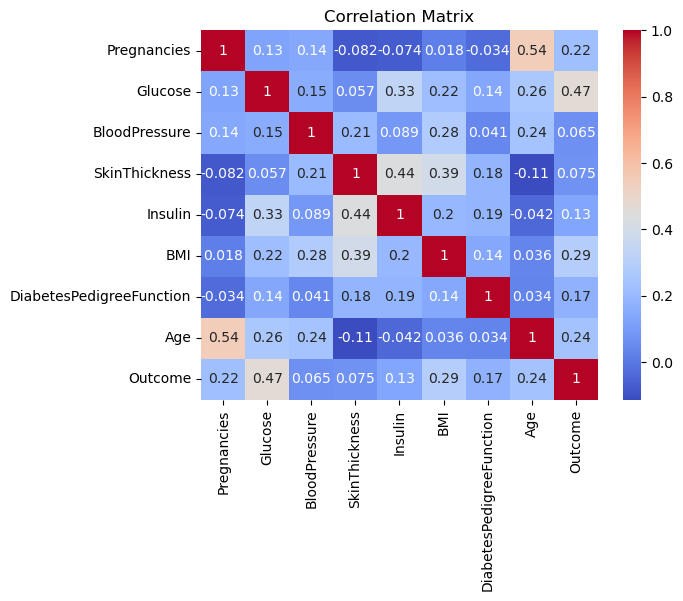

In [5]:
# 3. is there a correlation between predictor variables? a correlation matrix should show us.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



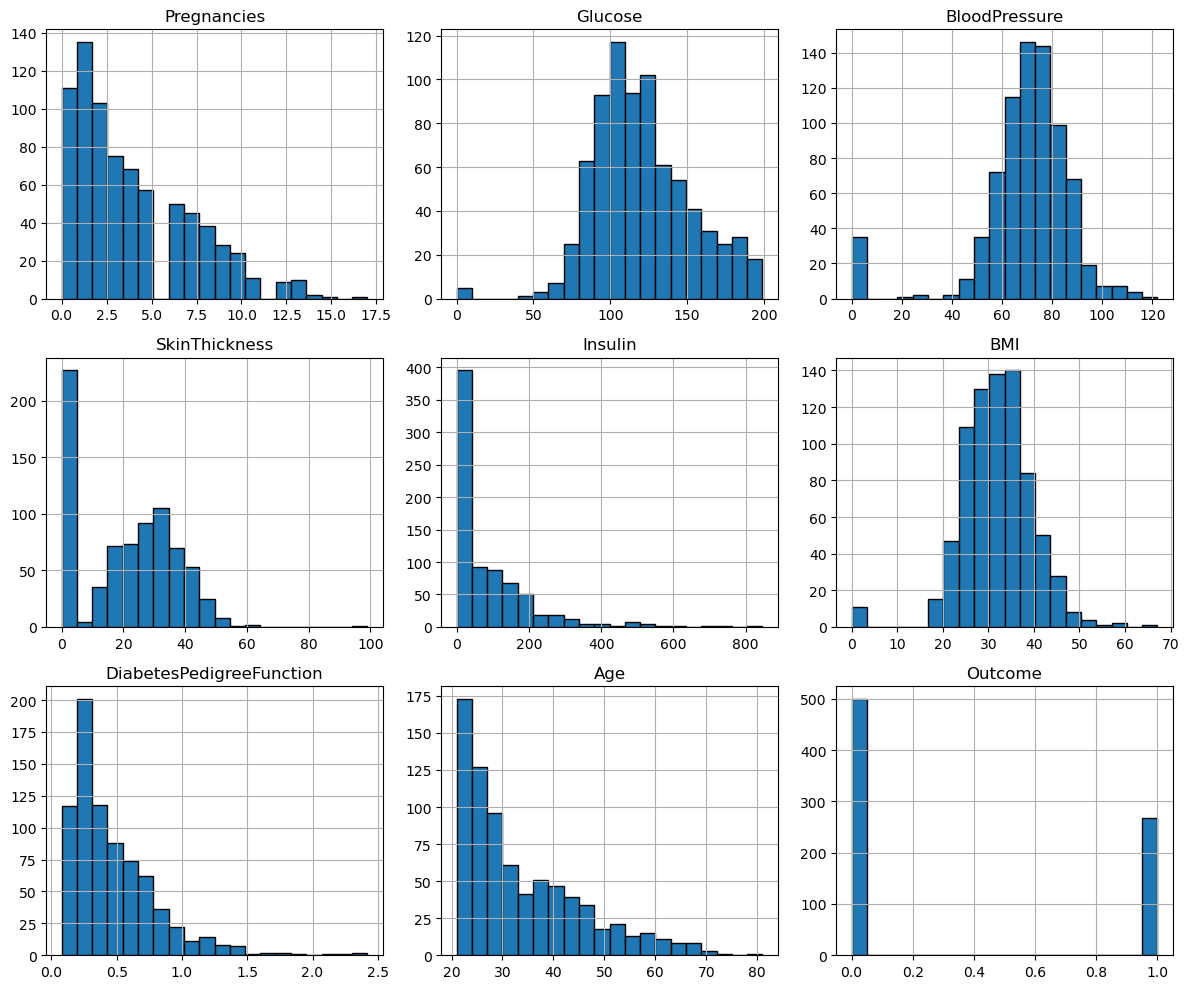

In [6]:
# 4. are the variables normally distributed?
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()




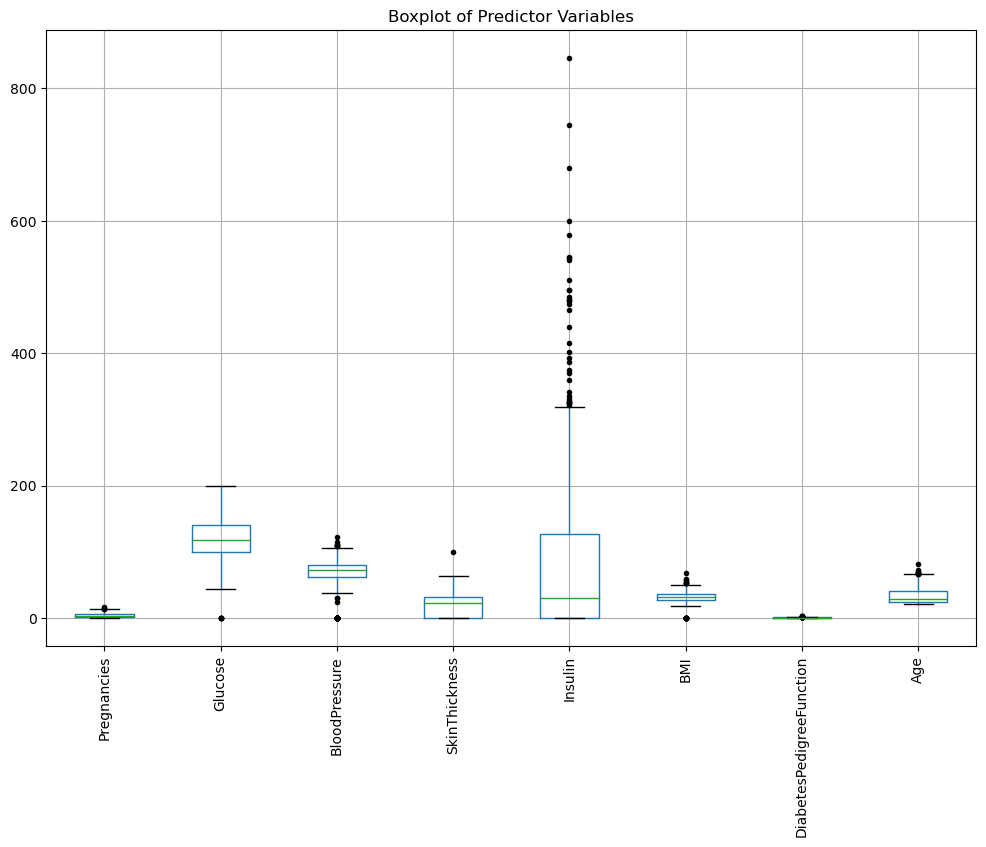

In [7]:
# 5. Identify outliers in predictor variables

#box plots to show outliers
plt.figure(figsize=(12, 8))
df.drop('Outcome', axis=1).boxplot(sym='k.')
plt.title('Boxplot of Predictor Variables')
plt.xticks(rotation='vertical')
plt.show()



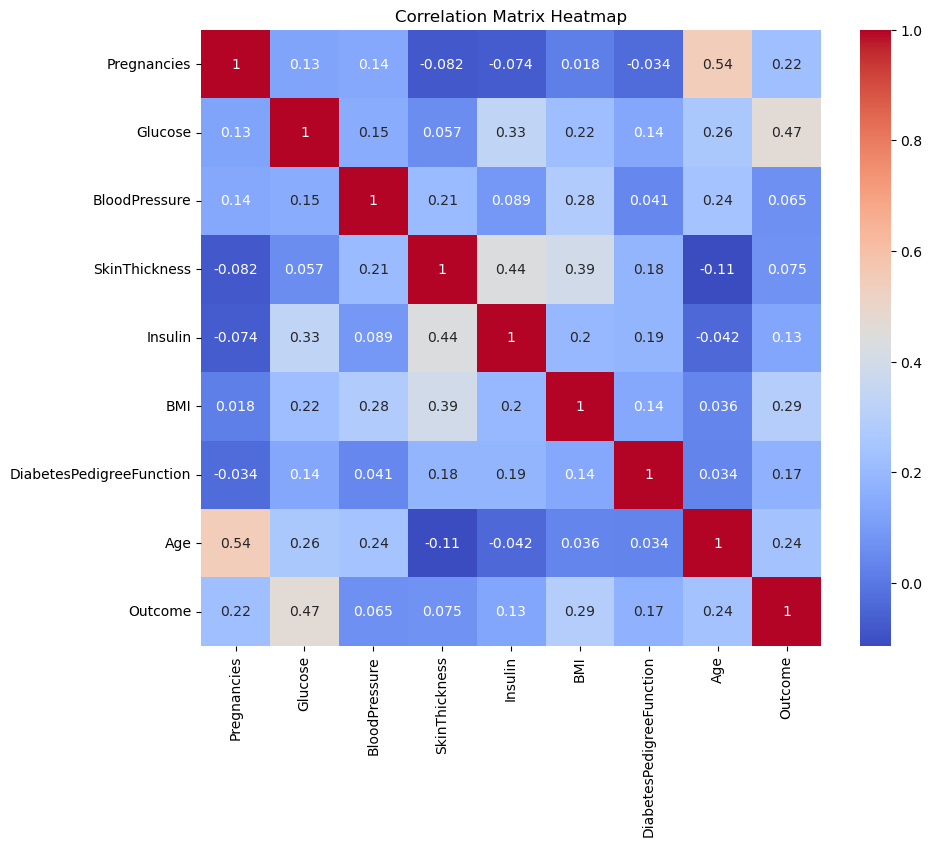

In [8]:
# 6. Explore the relationships between predictor variables
# Calculate the correlation matrix
correlation_matrix = df.corr()

# show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



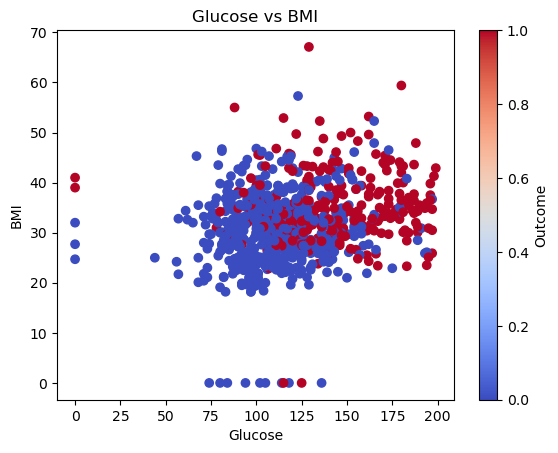

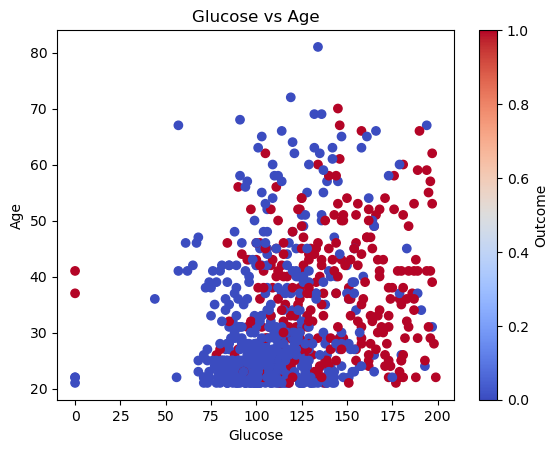

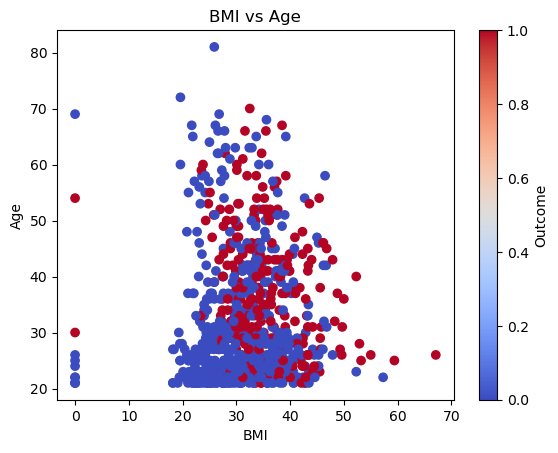

In [9]:
# 7. Investigate interaction effects between predictor variables

#use these ones for now becuase they work well
predictor_vars = ['Glucose', 'BMI', 'Age']


#scatter plots 
for i in range(len(predictor_vars)):
    for j in range(i+1, len(predictor_vars)):
        plt.scatter(df[predictor_vars[i]], df[predictor_vars[j]], c=df['Outcome'], cmap='coolwarm')
        plt.xlabel(predictor_vars[i])
        plt.ylabel(predictor_vars[j])
        plt.title(f'{predictor_vars[i]} vs {predictor_vars[j]}')
        plt.colorbar(label='Outcome')
        plt.show()



In [10]:
# 8. average age
average_age = df['Age'].mean()
print("Average Age:", average_age)



Average Age: 33.240885416666664


In [11]:
# 9. Average glucose
average_glucose_by_outcome = df.groupby('Outcome')['Glucose'].mean()
print("Average Glucose by Outcome:\n", average_glucose_by_outcome)



Average Glucose by Outcome:
 Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


In [12]:
# 10. Average BMI
average_bmi_by_outcome = df.groupby('Outcome')['BMI'].mean()
print("Average BMI by Outcome:\n", average_bmi_by_outcome)



Average BMI by Outcome:
 Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64


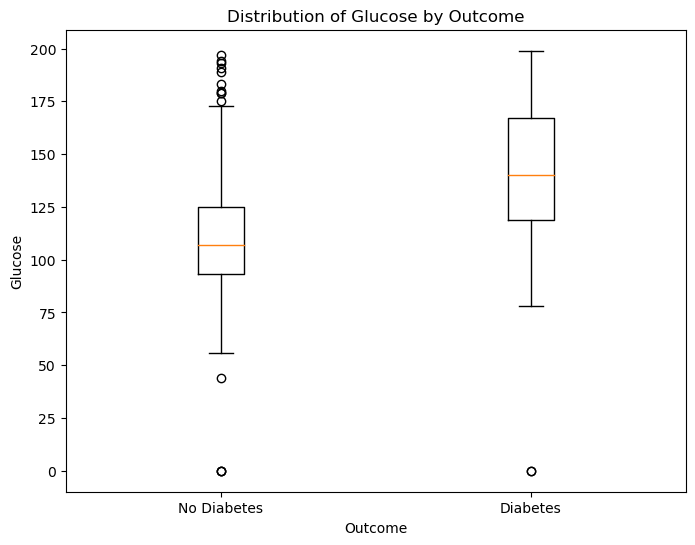

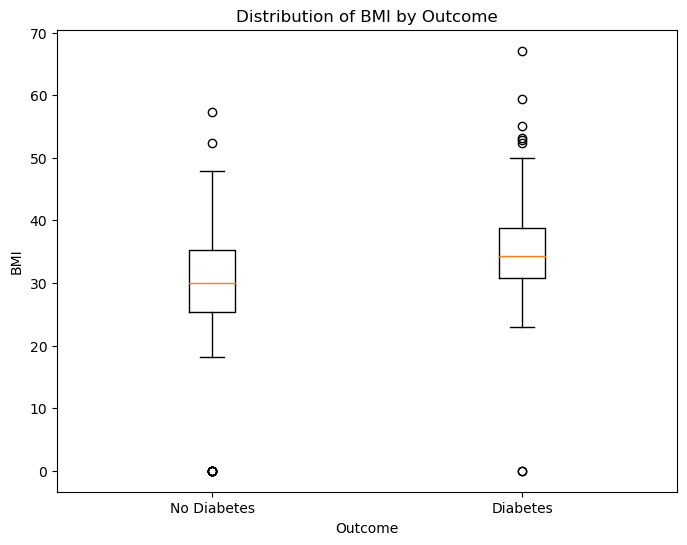

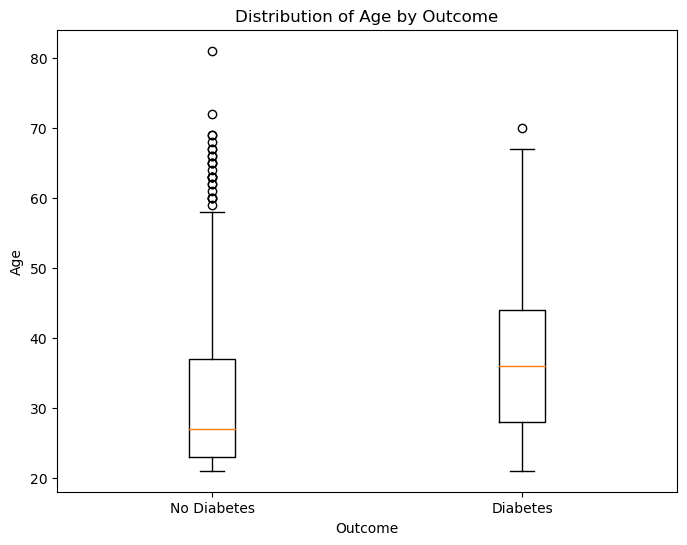

In [13]:
# 11. Compare the distribution of predictor variables for individuals with and without diabetes

# use these ones for now expand for better analysis
predictor_vars = ['Glucose', 'BMI', 'Age']

# create box plots
for var in predictor_vars:
    plt.figure(figsize=(8, 6))
    plt.boxplot([df[var][df['Outcome'] == 0], df[var][df['Outcome'] == 1]], labels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Outcome')
    plt.ylabel(var)
    plt.title(f'Distribution of {var} by Outcome')
    plt.show()




In [14]:
#no gender informationw as available

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [15]:
df = pd.read_csv("diabetes.csv")

# hadnle missing values
imputer = SimpleImputer(strategy='median')
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# handle outliers
def handle_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])

outlier_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in outlier_columns:
    handle_outliers(df, column)

# Scale the features
scaler = StandardScaler()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = scaler.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# creating a new feature
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, df['Age'].max()], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# one hot encode the age groups into dummy variables
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
age_group_encoded = onehot_encoder.fit_transform(df[['Age_Group']])
age_group_df = pd.DataFrame(age_group_encoded, columns=np.unique(df['Age_Group']).tolist()[:-1])
df = pd.concat([df, age_group_df], axis=1)
df = df.drop('Age_Group', axis=1)

# final frame
finaldf = df.copy()


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(finaldf.drop('Outcome', axis=1), finaldf['Outcome'], test_size=0.2, random_state=42)

# random forest and randomsearch dictionary
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(random_forest, rf_param_dist, n_iter=10, cv=5, scoring='accuracy')
rf_random_search.fit(X_train, y_train)
best_random_forest = rf_random_search.best_estimator_
rf_predictions = best_random_forest.predict(X_test)

# log regression and randomizedsearchCV
lr_param_dist = {
    'C': loguniform(1e-4, 1e4),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logistic_regression = LogisticRegression()
lr_random_search = RandomizedSearchCV(logistic_regression, lr_param_dist, n_iter=10, cv=5, scoring='accuracy')
lr_random_search.fit(X_train, y_train)
best_logistic_regression = lr_random_search.best_estimator_
lr_predictions = best_logistic_regression.predict(X_test)

# efvaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)

# store results in frame
results = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, lr_accuracy],
    'Precision': [rf_precision, lr_precision],
    'Recall': [rf_recall, lr_recall],
    'F1-Score': [rf_f1_score, lr_f1_score],
    'ROC-AUC': [rf_roc_auc, lr_roc_auc]
})

#print everything out
print("Dataset:")
print(finaldf)
print("\nModel Evaluation Results:")
print(results)



Dataset:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  0.866045      -0.017650       0.928238 -0.785193  0.218695   
1              1 -1.205066      -0.556276       0.545788 -0.785193 -0.873966   
2              8  2.016662      -0.735818      -1.302720 -0.785193 -1.389077   
3              1 -1.073567      -0.556276       0.163338  0.426380 -0.639824   
4              0  0.504422      -2.890320       0.928238  1.380171  1.701591   
..           ...       ...            ...            ...       ...       ...   
763           10 -0.679069       0.341433       1.756879  1.534840  0.109429   
764            2  0.011301      -0.197192       0.418305 -0.785193  0.718196   
765            5 -0.021574      -0.017650       0.163338  0.658383 -0.936403   
766            1  0.142800      -1.094901      -1.302720 -0.785193 -0.327635   
767            1 -0.942068      -0.197192       0.673271 -0.785193 -0.280807   

     DiabetesPedigreeFunction 

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [17]:
#during exploratory data analysis i learned what to do with missing numbers as some values may be discreet
#and should be handled different as opposed to continuous values for example the median was given for pregnancies
#and the rest were replaced with mean which accounts for average values better

In [18]:
#I learned that some models are too complex to not optimize. I would have loved to try gridsearch and
# randomsearchCV on SVM and DBSCAN but my computer was not fast enough. more 
# complicated algorithms are not required in this question.logistic regression and random forrest are enough.

In [19]:
#I learned about scaling data, it makes so much more sense to test data all at the same scale as opposed
#to a bunch of long and non uniform vectors that would just be unusual to work with.We get a much better view of how the predictor vairables 
#related to eachother and the target vriable if they are all the same scale.

In [23]:
# i also learned how to make a prediciton with some new data. Here is a new person and their data and i am
#predicting them to be diabetic. the next logiccal step is ismulating groups of peoples diabetic predictions in the dataframe
#by adding more people as rows
# New person's data
new_person_data = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [120],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [80],
    'BMI': [25],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [35],
    'Adult': [1.0],
    'Senior': [0.0]
})

# make predictions with random forest
rf_predictions = best_random_forest.predict(new_person_data)
rf_prediction_result = "Diabetic" if rf_predictions[0] == 1 else "Non-Diabetic"

# make predictions with log regression
lr_predictions = best_logistic_regression.predict(new_person_data)
lr_prediction_result = "Diabetic" if lr_predictions[0] == 1 else "Non-Diabetic"

# print results
print("Random Forest Classifier Prediction:")
print("Based on the given data, the Random Forest Classifier predicts that the person is", rf_prediction_result)

print("\nLogistic Regression Prediction:")
print("Based on the given data, the Logistic Regression model predicts that the person is", lr_prediction_result)


Random Forest Classifier Prediction:
Based on the given data, the Random Forest Classifier predicts that the person is Diabetic

Logistic Regression Prediction:
Based on the given data, the Logistic Regression model predicts that the person is Diabetic


In [27]:
#using numpy and a new dataframe i can also simulate sample populations at my command
#for example here is a sample population of females with high pregnancies and high bmi.
#i have predicted with this model that all my values of random seed 42 on this generated table are diabetic
np.random.seed(42)

# Generate sample population data
sample_population_size = 5  # Number of individuals in the population

# Generate random values within the specified ranges of simulation
pregnancies = np.random.randint(4, 10, size=sample_population_size)
glucose = np.random.randint(80, 200, size=sample_population_size)
blood_pressure = np.random.randint(60, 100, size=sample_population_size)
skin_thickness = np.random.randint(20, 40, size=sample_population_size)
insulin = np.random.randint(70, 120, size=sample_population_size)
bmi = np.random.uniform(25, 30, size=sample_population_size)
diabetes_pedigree_function = np.random.uniform(0.2, 0.8, size=sample_population_size)
age = np.random.randint(20, 50, size=sample_population_size)
adult = np.ones(sample_population_size)
senior = np.zeros(sample_population_size)

# create the population dataframe
sample_population_data = pd.DataFrame({
    'Pregnancies': pregnancies,
    'Glucose': glucose,
    'BloodPressure': blood_pressure,
    'SkinThickness': skin_thickness,
    'Insulin': insulin,
    'BMI': bmi,
    'DiabetesPedigreeFunction': diabetes_pedigree_function,
    'Age': age,
    'Adult': adult,
    'Senior': senior
})

# predict with the random forest model
rf_predictions = best_random_forest.predict(sample_population_data)
rf_prediction_results = ["Diabetic" if prediction == 1 else "Non-Diabetic" for prediction in rf_predictions]

# pedict with the logistic regresion model
lr_predictions = best_logistic_regression.predict(sample_population_data)
lr_prediction_results = ["Diabetic" if prediction == 1 else "Non-Diabetic" for prediction in lr_predictions]

# combine predictions
sample_population_data['RF_Prediction'] = rf_prediction_results
sample_population_data['LR_Prediction'] = lr_prediction_results

# output the final table
print("Sample Population Data with Predictions:")
print(sample_population_data)


Sample Population Data with Predictions:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            7      182             83             21       81  27.623873   
1            8      162             95             31       91  26.999305   
2            6      166             99             25      113  25.233328   
3            8      154             83             21       94  29.868778   
4            8      154             62             20      118  26.163857   

   DiabetesPedigreeFunction  Age  Adult  Senior RF_Prediction LR_Prediction  
0                  0.254364   24    1.0     0.0      Diabetic      Diabetic  
1                  0.571032   38    1.0     0.0      Diabetic      Diabetic  
2                  0.429477   26    1.0     0.0      Diabetic      Diabetic  
3                  0.789939   40    1.0     0.0      Diabetic      Diabetic  
4                  0.480058   28    1.0     0.0      Diabetic      Diabetic  
